In [6]:
import os
import re
from datetime import datetime
import importlib

import numpy as np
import pandas as pd

import eeg

#might have to change to inline for colab
%matplotlib notebook 
from matplotlib import pyplot as plt, gridspec

In [7]:
#run if you change something in the eeg class - by default python doesn't reimport even if the code changes
importlib.reload(eeg) 

<module 'eeg' from 'C:\\projects\\misc\\byb_2019\\eeg.py'>

In [9]:
data_dir = r"C:\data\2019_06 BYB"
wavefiles = [os.path.join(data_dir, filepath) for filepath in os.listdir(data_dir) if filepath.endswith('.wav')]
textfiles = [os.path.join(data_dir, os.path.splitext(wf)[0]+'-events.txt') for wf in wavefiles]

#Make sure there is an events file for all wave files
assert all([os.path.exists(tf) for tf in textfiles]), "Missing text file"


In [10]:
#Read in data for all subjects
subjects = []
for filenum in range(len(wavefiles)):
    wf = wavefiles[filenum]
    tf = textfiles[filenum]

    subject = eeg.EEG(wf, tf)
    subjects.append(subject)


<IPython.core.display.Javascript object>


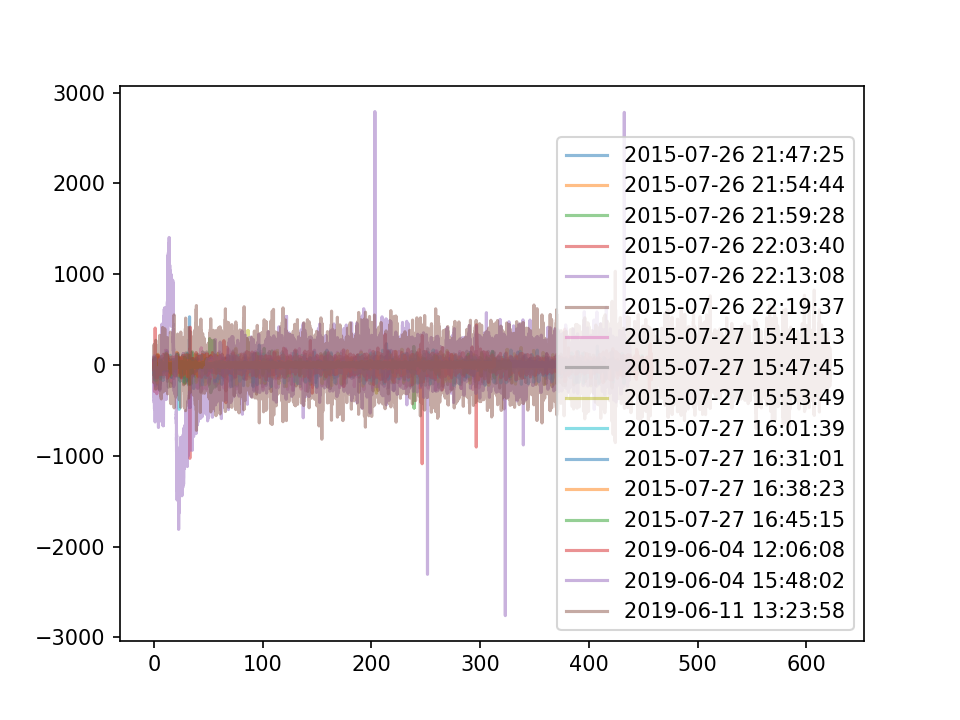

In [14]:
plt.figure() 
for s in subjects:
    plt.plot(s.sample_times, s.wavedata, alpha=.5, label=s.datetime)
# plt.legend()